In [19]:
import os
print(os.getcwd())


c:\Users\User\OneDrive\Documents\Zunaira\Zunaira CSUF\Coursework\Fall 2025\CPSC 481\Chefbot\evaluation


In [20]:
import sys
import os
print(sys.executable)  # Should be C:\Python314\python.exe

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
print("All packages imported successfully!")


c:\Python314\python.exe
All packages imported successfully!


In [21]:
import sys
import os

# Add the evaluation folder (notebook folder) to path
sys.path.append(os.path.abspath('.'))

# Import evaluation module
import evaluation

# Alias functions
evaluate_recommender = evaluation.evaluate_recommender
compute_metrics = evaluation.compute_metrics
test_queries = evaluation.test_queries

print("Import successful!")

Import successful!


Evaluations:


In [22]:
df = evaluate_recommender(test_queries)
print("Evaluation Results:")
display(df)

metrics = compute_metrics(df)
print("\nOverall Metrics:")
for k, v in metrics.items():
    if v is not None:
        print(f"{k}: {v:.2f}")
    else:
        print(f"{k}: N/A")

Evaluation Results:


,query,diet_restrictions,num_recipes,coverage,constraint_satisfaction,avg_relevance,response_time
0,"chicken, rice",None,5,1,NaN,1.000000,0.001512
1,"pasta, tomato",None,5,1,NaN,0.700000,0.002313
2,"tofu, broccoli",vegetarian,3,1,1.0,0.500000,0.006108
3,"lettuce, tomato, cucumber",vegan,1,1,1.0,0.666667,0.002048
4,"beef, potato",keto,0,0,0.0,0.000000,0.002471



Overall Metrics:
Average Coverage (%): 80.00
Average Constraint Satisfaction (%): 66.67
Average Relevance: 0.57
Average Response Time (s): 0.00


In [14]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

Coverage Plot

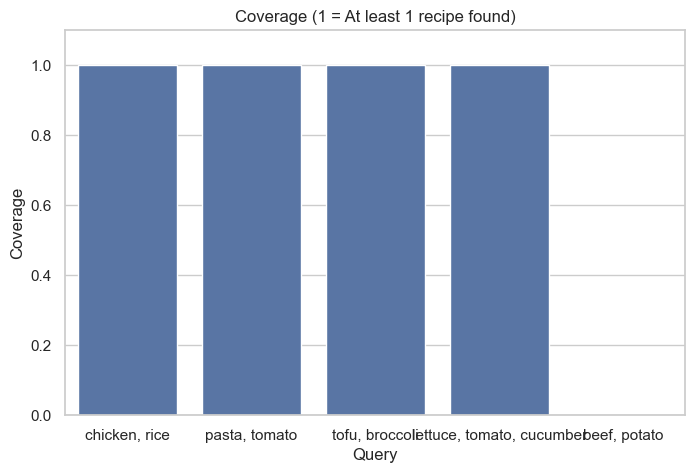

In [15]:
plt.figure()
sns.barplot(x="query", y="coverage", data=df)
plt.title("Coverage (1 = At least 1 recipe found)")
plt.ylabel("Coverage")
plt.xlabel("Query")
plt.ylim(0,1.1)
plt.show()

Constraint Satisfaction Plot

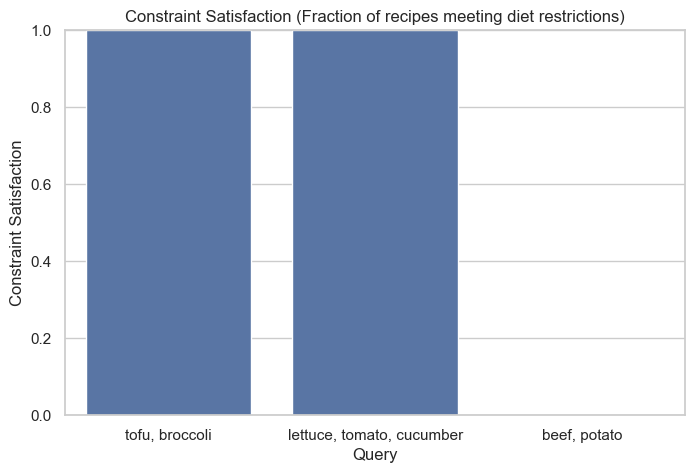

In [16]:
plt.figure()
df_constraints = df[df["constraint_satisfaction"].notna()]
sns.barplot(x="query", y="constraint_satisfaction", data=df_constraints)
plt.title("Constraint Satisfaction (Fraction of recipes meeting diet restrictions)")
plt.ylabel("Constraint Satisfaction")
plt.xlabel("Query")
plt.ylim(0,1.0)
plt.show()

Average Relevance Plot

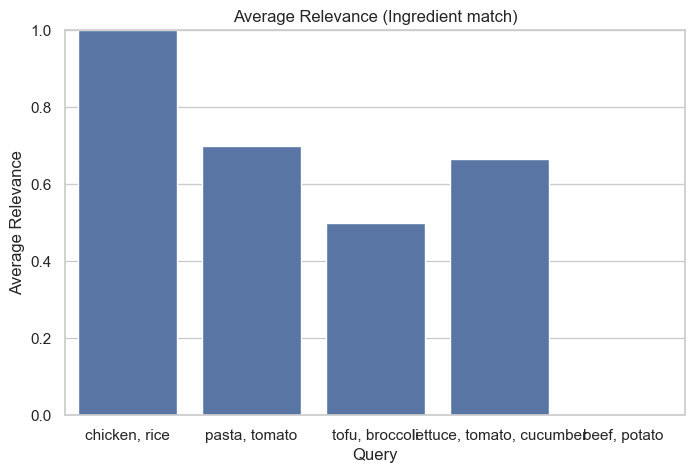

In [17]:
plt.figure()
sns.barplot(x="query", y="avg_relevance", data=df)
plt.title("Average Relevance (Ingredient match)")
plt.ylabel("Average Relevance")
plt.xlabel("Query")
plt.ylim(0,1.0)
plt.show()

Response Time

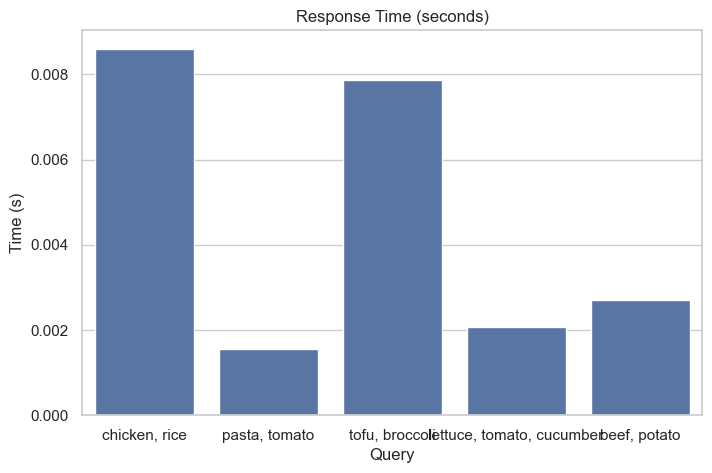

In [18]:
plt.figure()
sns.barplot(x="query", y="response_time", data=df)
plt.title("Response Time (seconds)")
plt.ylabel("Time (s)")
plt.xlabel("Query")
plt.show()